**TASK 3: TO CHECK DATA QUALITY**

In this section, I quickly examined null values for each of the tables and the numerical distribution.

As it turns out, for these data frames, there are many columns with a high rate of missing values especially in Receipts and Brands, There are multiple columns in receipts which has more than 50% of null values.

bonusPointsEarned, bonusPointsEarnedReason, pointsAwardedDate from Receipts
categoryCode, topBrand from Brand table.

High NA values can be problematic in some cases. For example, when joining the items table to the brands table, with quite some missing values in the barCode column in the items table, the join of the two tables might lead to incomplete information.

I also checked the distribution of the numerical columns. Again, some make sense to have little rows being extreme values. However, it is worth confirming with the business stakeholders to make sure that these numbers (for example, earning 8000+ points, purchasing 200+ items) are aligned with the business.

In [8]:
import pandas as pd
import numpy as np
import json
import sql
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Checking Null Values in the dataset

In [2]:
receipts = pd.read_json('receipts.json', lines=True)

In [3]:
print(receipts.isnull().sum())


_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64


In [4]:
brands = pd.read_json('brands.json', lines=True)

In [5]:
print(brands.isnull().sum())


_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64


In [6]:
users = pd.read_json('users.json', lines=True)
print(users.isnull().sum())

_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64


Plotting percentage of null values

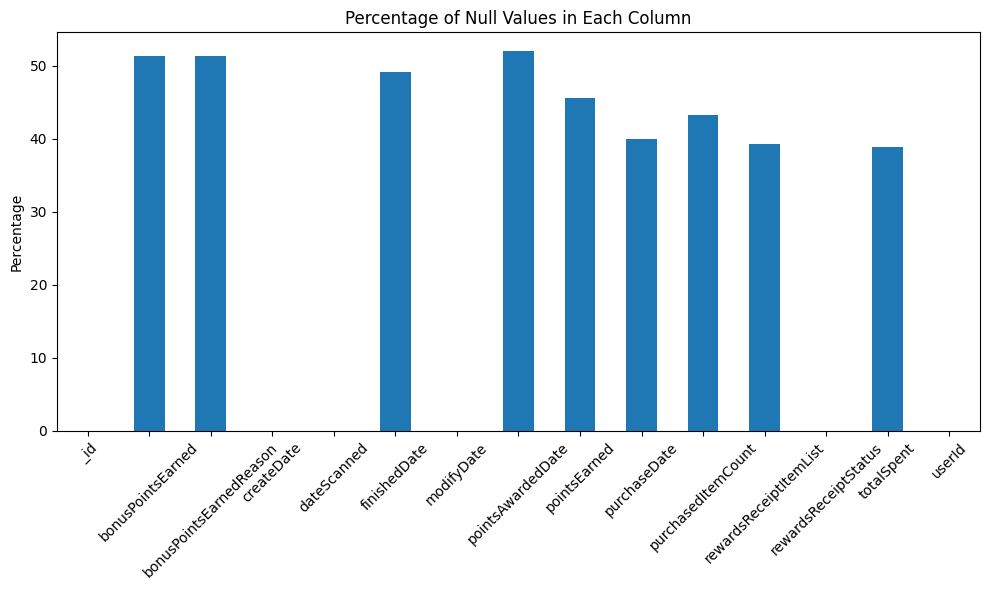

In [33]:
#for receipts
null_percentage = (receipts.isnull().sum() / len(receipts)) * 100

plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar')
plt.title('Percentage of Null Values in Each Column')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


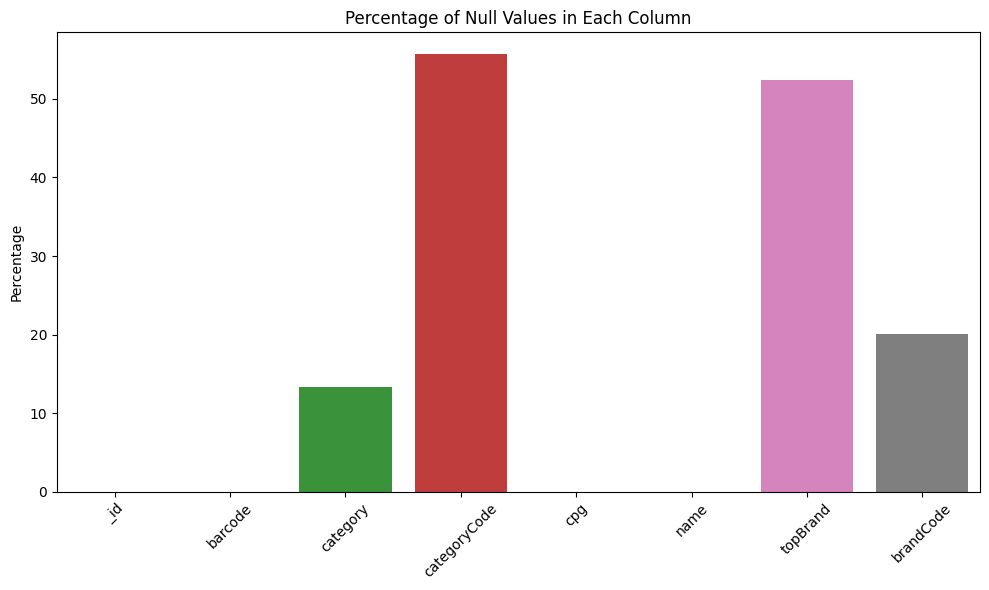

In [25]:
#for brands
null_percentage = (brands.isnull().sum() / len(brands)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values)
plt.title('Percentage of Null Values in Each Column')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


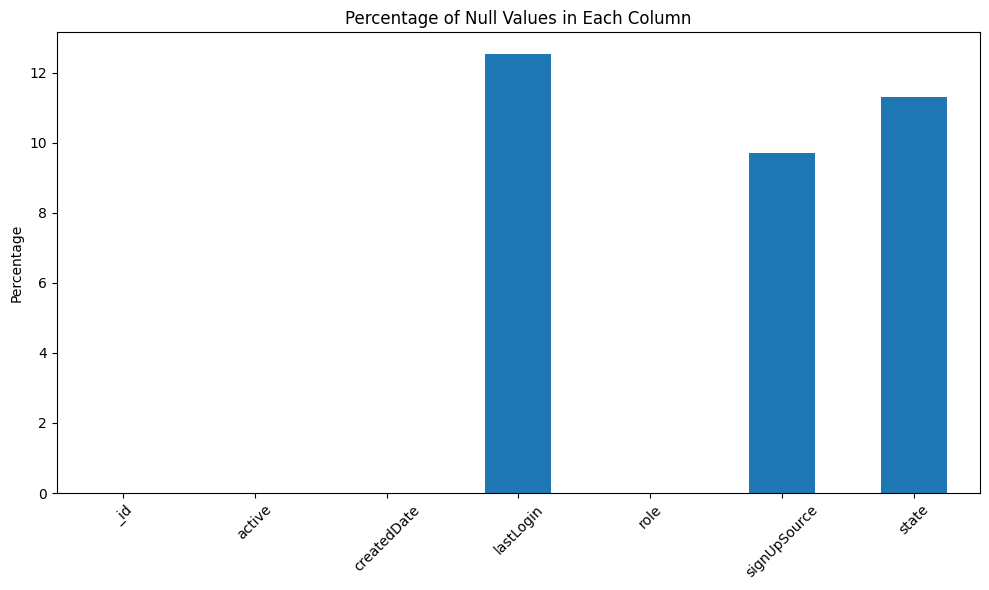

In [27]:
#for users
null_percentage = (users.isnull().sum() / len(users)) * 100

plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar')
plt.title('Percentage of Null Values in Each Column')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Checking numerical Distribution

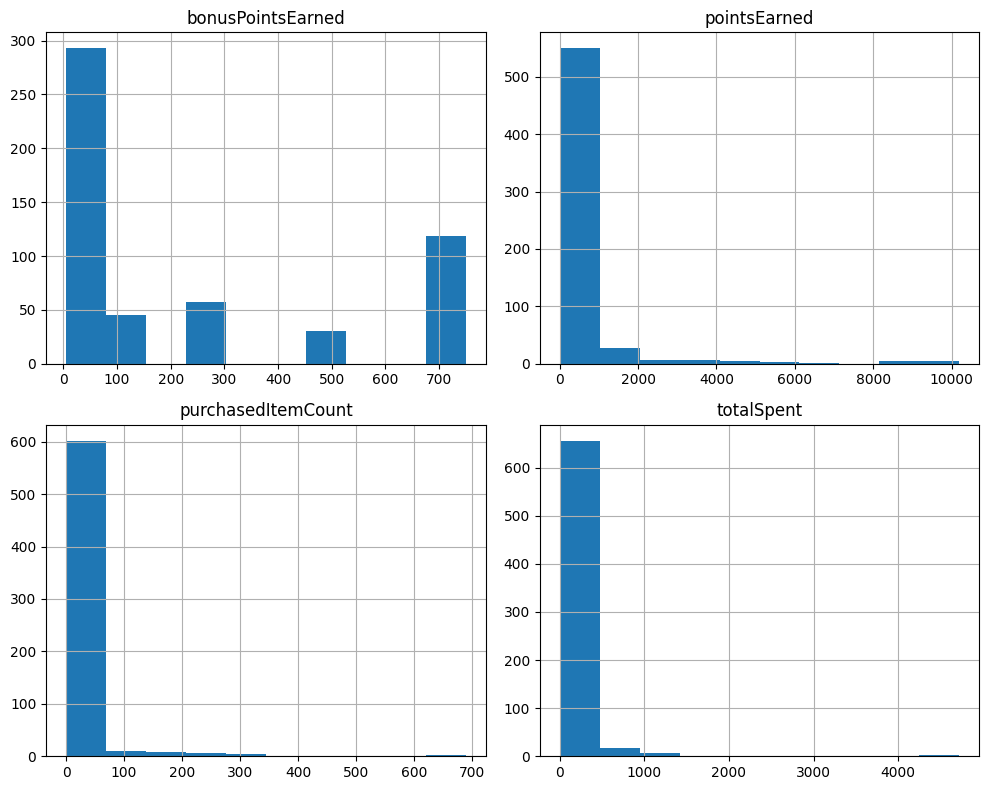

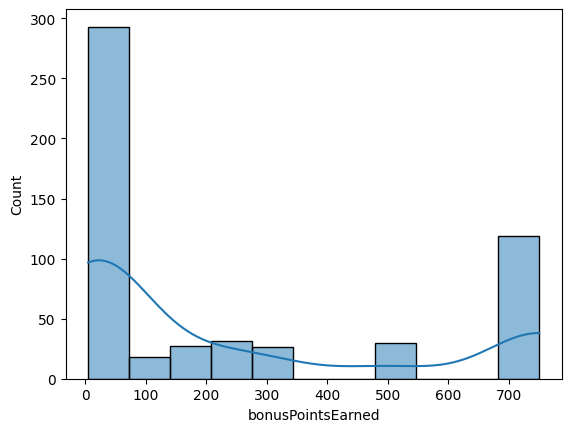

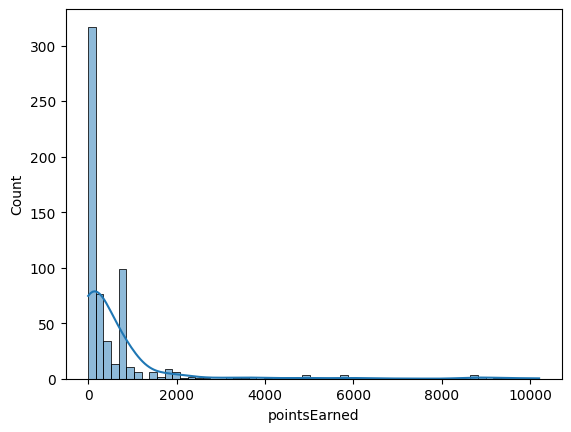

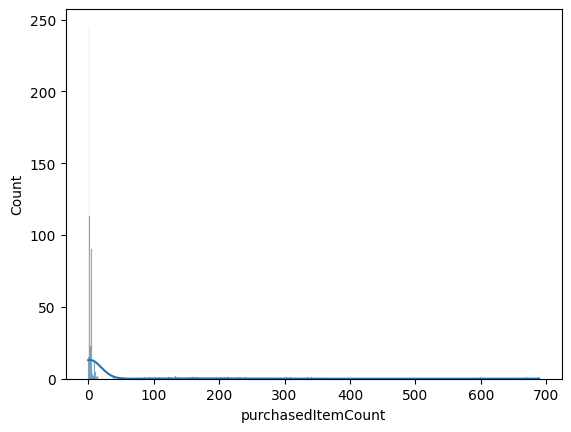

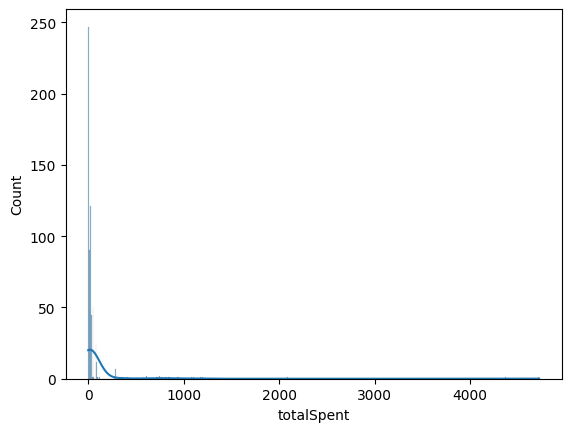

In [10]:
numerical_columns = receipts.select_dtypes(include=['float64', 'int64'])


numerical_columns.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


for column in numerical_columns.columns:
    sns.histplot(data=numerical_columns, x=column, kde=True)
    plt.show()


Plotting potential outliers

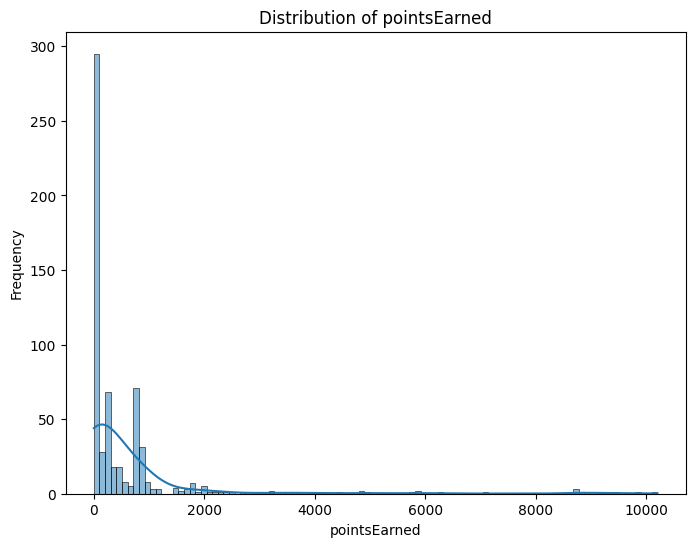

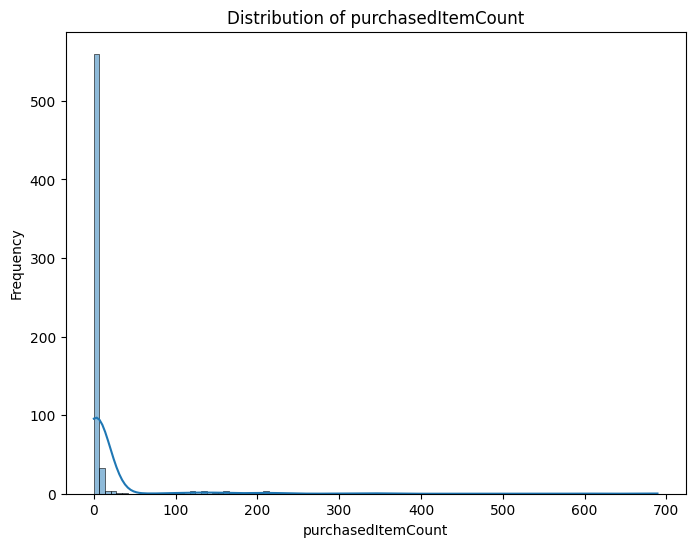

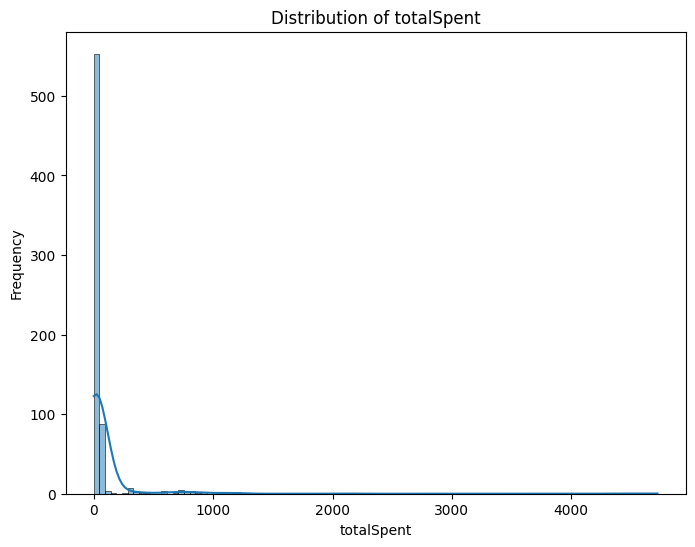

In [31]:
def plot_col_distribution(df, col, bins=30):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=bins, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


def plot_potential_outliers(df, num_sigma, bins):
    stats = df.describe().transpose()
    cols = stats[stats['max'] > stats['mean'] + stats['std'] * num_sigma].index.tolist()
    for col in cols:
        plot_col_distribution(df, col, bins=bins)


plot_potential_outliers(receipts, 3, 100)
